<div align='left'>
    <h1 style="color: #FFA500; font-size: 36px; font-weight: bold;">[LAB 09] SỰ PHÂN LỚP DỮ LIỆU</h1>
</div>

> **Sinh viên:** Nguyễn Công Hoài Nam  
> **Mã số sinh viên:** 21280099

### **1. SVM với tập dữ liệu tách rời tuyến tính**

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs, make_circles

sns.set_style('whitegrid')


Khởi tạo tập dữ liệu có 50 điểm và 2 cụm

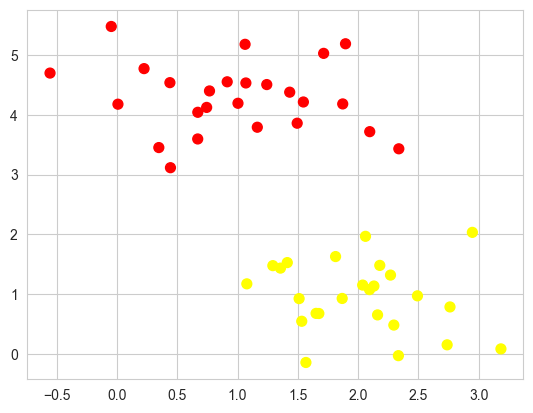

In [129]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Vẽ đường thẳng phân tách 2 cụm

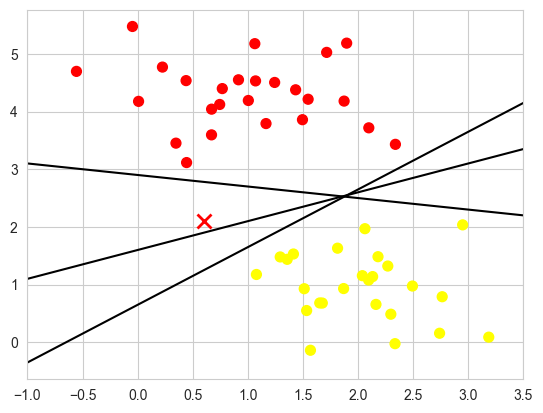

In [130]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit+b, '-k')

plt.xlim(-1, 3.5)
plt.show()


Vẽ siêu phẳng lề lớn


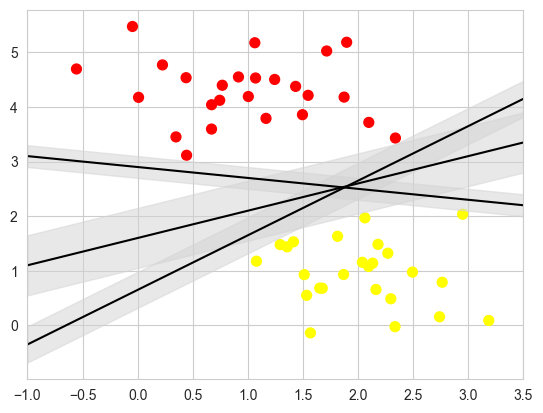

In [131]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit+b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()

Sử dụng `support vector classifier (SVC)` của `Scikit-Learn` để huấn luyện mô hình SVM và vẽ các biên quyết định của SVM

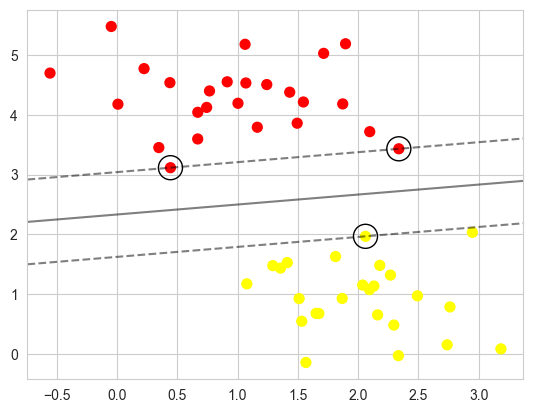

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [132]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[
                   :, 1], s=300, linewidth=1, edgecolors='black', facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

### **2. SVM với tập dữ liệu không tuyến tính**

Khởi tạo tập dữ liệu có 50 điểm.

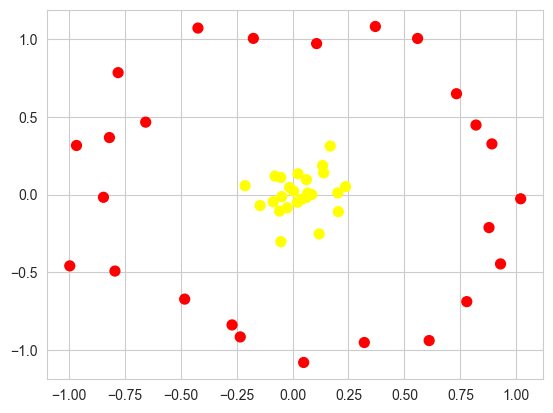

In [133]:
X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Sử dụng hàm `radial basis function` và vẽ dữ liệu trong không gian 3 chiều

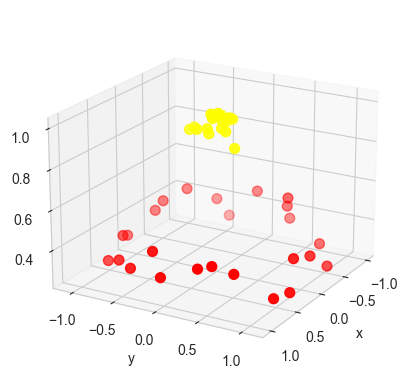

In [134]:
r = np.exp(-(X**2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

Huấn luyện mô hình SVC với radial kernel

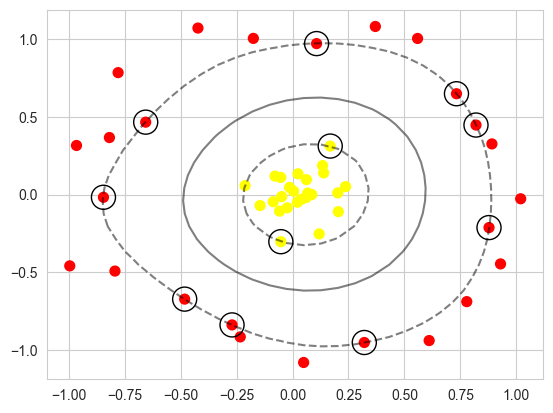

array([[ 0.81996168,  0.44833487],
       [-0.27053561, -0.84001755],
       [ 0.10736317,  0.97341138],
       [-0.84537492, -0.01729409],
       [ 0.87814757, -0.21266344],
       [ 0.32069968, -0.95344486],
       [ 0.73271625,  0.65017857],
       [-0.65653391,  0.46697995],
       [-0.48229833, -0.67379082],
       [ 0.16835609,  0.31280485],
       [-0.05236199, -0.30358879]])

In [135]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

def plot_SVC_decision_function(model, ax = None, plot_support= True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()


    #create grid to evaluate model 
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)

    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    #plot decision boundary and margins
    ax.contour (X, Y, P, colors='k', 
                levels=[-1, 0, 1], alpha=0.5, 
                linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter (model.support_vectors_[:, 0], 
                    model.support_vectors_[:, 1], 
                    s=300, linewidth=1, edgecolors='black', 
                    facecolors='none')
    ax.set_xlim(xlim) 
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

### 3. **Yêu cầu**

### Thông tin về dữ liệu

Tập dữ liệu `banknote authentication` gồm các đặc trung được trích xuất từ các hình ảnh được chụp xác thực các tờ tiền giấy (hợp lệ hay giả mạo)

Chúng bao gồm các đặc trưng sau đây:

1. **Variance**: độ biến thiên

2. **Skewness**: độ lệch

3. **Curtosis**: độ nhọn

4. **Entropy**: mức độ hỗn loạn

5. **Class**: outcome (1: hợp lệ, 0: giả mạo)

Import data từ `UCI Machine Learning Repository`

In [136]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features
y = banknote_authentication.data.targets
df = pd.concat([X, y], axis=1)
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Kiểm tra tính tuyến tính

Ma trận hiệp phương sai

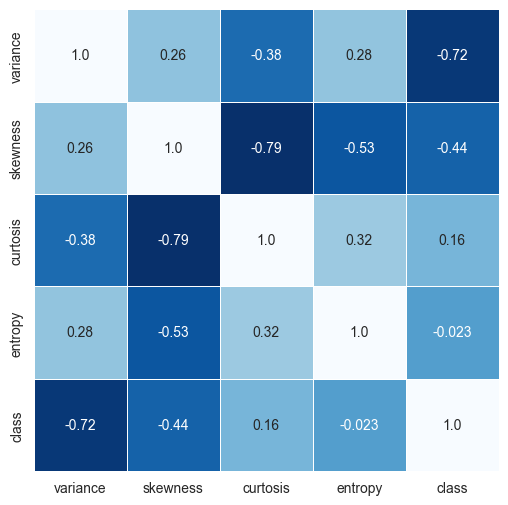

In [137]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap="Blues_r", annot=True, fmt='.2',linewidths=.5, cbar=False)
# Show the plot
plt.show()

- Những cặp feature có tương quan gần cao (gần với -1 hoặc 1) thì chúng tuyến tính, ngược lại chúng phi tuyến.

- Ta có có thể thấy một số cặp feature có sự tuyến tính như (sknewness với curtoisis) nhưng cũng có nhiều cặp features phi tuyến như (curtosis và class).

- Ta kết luận bộ dữ liệu không hoàn toàn tuyến tính 

Kiểm chứng lại bằng scatter plot

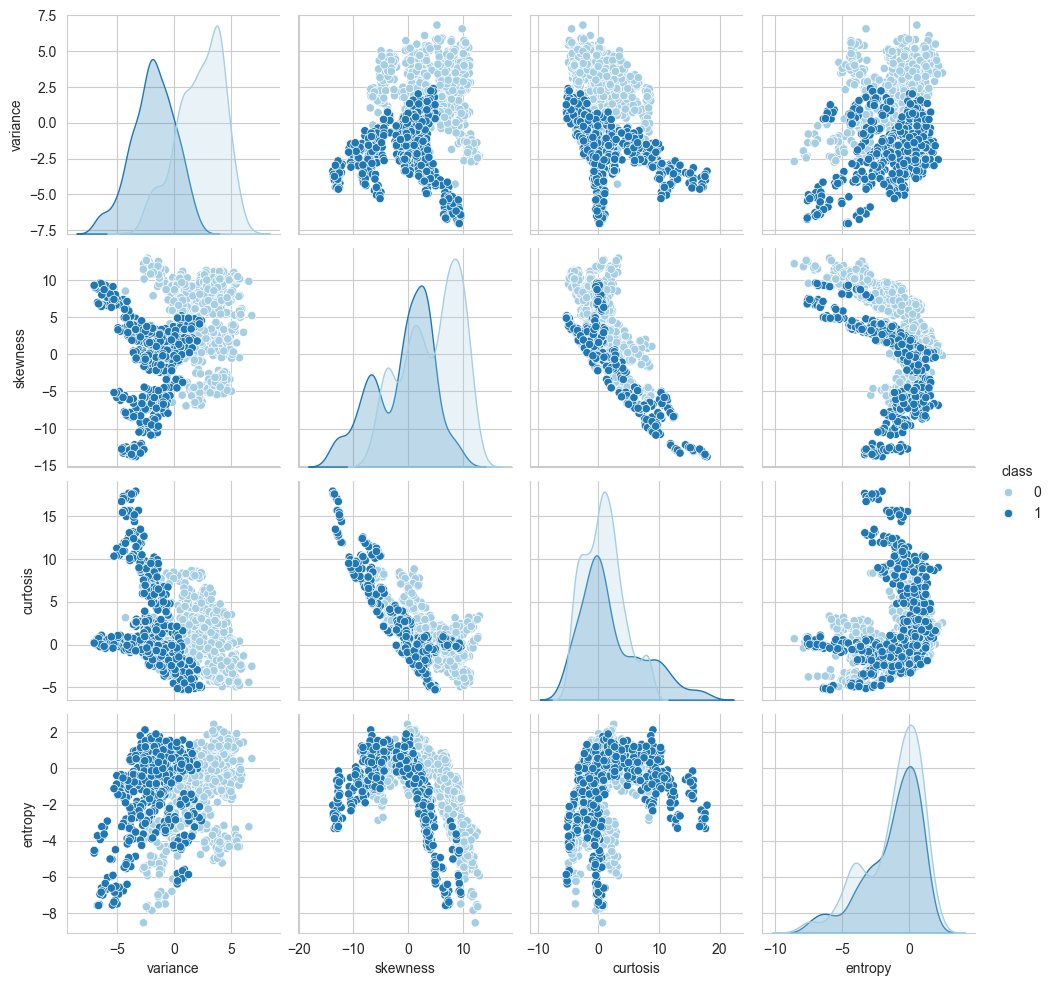

In [138]:
sns.pairplot(df, hue = 'class', palette="Paired")

- Các điểm dữ liệu không phân tán theo một đường thẳng hoàn toàn

### Xây dựng mô hình

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

#### Chia dữ liệu thành tập train và tập test

In [140]:
# Split dataset
X = X.values
y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Chuẩn hoá dữ liệu

In [141]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Hyperparameter tuning

In [206]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Sử dụng GridSearchCV để tìm best hyperparameters cho model với kernel = 'rbf'
svc = SVC()
best_svc = GridSearchCV(svc, param_grid)
best_svc.fit(X_train, y_train)
print(f"Best param: {best_svc.best_params_}")

Best param: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


#### Evaluate

Hàm show một số metrics của model

In [143]:
def evaluate(y_true, y_pred):

    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    
    print("Classification report:\n", report)
    print("Confusion Matrix")

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Confusion Matrix


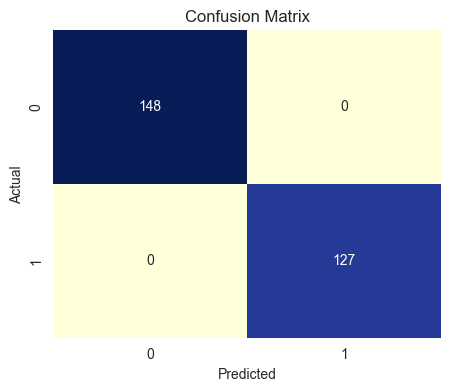

In [150]:
y_pred = best_svc.predict(X_test)
evaluate(y_test,y_pred)

### Visualization

Để trực quan hoá dữ liệu, ta phải giảm chiều dữ liệu về còn 2 chiều

In [203]:
# Hàm tạo mô hình SVC với PCA
def make_2D_SVC(X, y):
    pipeline = make_pipeline(
        PCA(n_components=2),  # PCA data xuống còn 2 chiều
        SVC(C=10, gamma=0.1, kernel='rbf')  # SVC với best hyperparameter tuning
    )
    pipeline.fit(X, y)
    X_2D = pipeline.named_steps['pca'].transform(X)
    model = pipeline.named_steps['svc']
    return X_2D, model


Hàm visualize

In [204]:
def visualize_2d_svm(X, y):
    X_2D, model = make_2D_SVC(X,y)
    plt.figure(figsize=(8, 8))
    plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, s=50, cmap='coolwarm', edgecolor='k')
    
    # Lấy giới hạn của biểu đồ
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Tạo lưới để đánh giá mô hình
    x = np.linspace(xlim[0], xlim[1], 200)
    y = np.linspace(ylim[0], ylim[1], 200)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Vẽ đường biên quyết định và lề
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Vẽ các support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=30, linewidth=1, edgecolors='black', facecolors='none', label='Support Vectors')
    
    # Thêm nhãn trục và tiêu đề
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('SVM Visualization')
    plt.legend()
    plt.tight_layout()
    plt.show()

Plot visualize

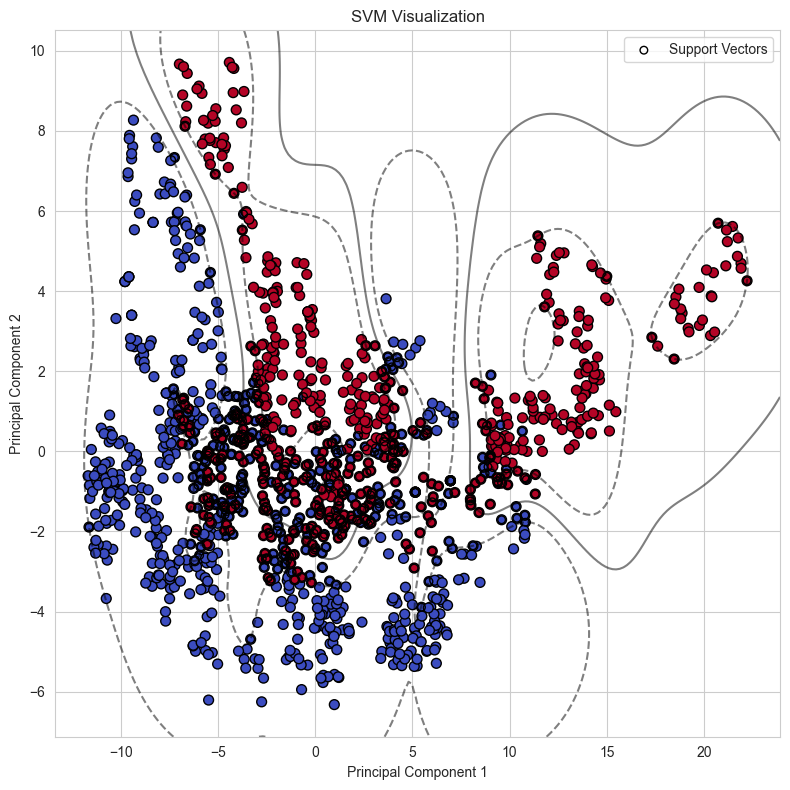

In [205]:
visualize_2d_svm(X,y)